<a href="https://colab.research.google.com/github/ShalilG/Stock-Market-Analysis/blob/main/SVCTradingStrategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 876 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
#Import the libraries

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [3]:
#Get the stock price
df = yf.download('NFLX', start = '2012-8-17')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-08-17,9.268571,9.360000,9.072857,9.098571,9.098571,22405600
2012-08-20,9.091429,9.335714,8.880000,9.177143,9.177143,26658800
2012-08-21,9.305714,9.521429,9.235714,9.371429,9.371429,23355500
2012-08-22,9.302857,9.485714,9.257143,9.342857,9.342857,18030600
2012-08-23,9.431429,9.491429,9.082857,9.150000,9.150000,32580800
...,...,...,...,...,...,...
2022-08-17,241.179993,244.240005,237.559998,241.149994,241.149994,5627200
2022-08-18,241.960007,246.479996,239.279999,245.169998,245.169998,5280400
2022-08-19,240.949997,243.289993,235.679993,241.160004,241.160004,7486600


In [4]:
#Create the independent variables 

df['High-Low'] = df['High'] - df['Low']
df['Open-Close'] = df['Open'] - df['Close']

In [5]:
#Store the independent variables in a variable called 'X'

X = df[['Open-Close', 'High-Low', 'Close']]

#Show the first 5 rows of data
X.tail()

,Open-Close,High-Low,Close
Date,,,
2022-08-17,0.029999,6.680008,241.149994
2022-08-18,-3.209991,7.199997,245.169998
2022-08-19,-0.210007,7.610001,241.160004
2022-08-22,6.010010,8.889999,226.539993
2022-08-23,1.910004,5.599991,224.550003


In [6]:
#Store the target variable into a variable called 'y'. If tomorrow's close 
#price is greater than today's close price then put 1 else put 0

y = np.where(df.Close.shift(-1) > df.Close, 1, 0)

#Show the data
y

array([1, 1, 0, ..., 0, 0, 0])

In [7]:
#Get the percentage to split the data (90% training data set and 10% test data set)
percentage_split = 0.9
row = int(df.shape[0]*percentage_split)

#Create the train dataset 

X_train = X[:row]
y_train = y[:row]

#Create the test dataset

X_test = X[row:]
y_test = y[row:]

In [8]:
X_train

,Open-Close,High-Low,Close
Date,,,
2012-08-17,0.170000,0.287143,9.098571
2012-08-20,-0.085714,0.455714,9.177143
2012-08-21,-0.065716,0.285715,9.371429
2012-08-22,-0.040000,0.228571,9.342857
2012-08-23,0.281429,0.408572,9.150000
...,...,...,...
2021-08-17,-3.440002,6.589966,518.909973
2021-08-18,-1.869995,7.729980,521.869995
2021-08-19,-20.970032,26.520020,543.710022


In [9]:
X_test

,Open-Close,High-Low,Close
Date,,,
2021-08-24,-1.929993,6.039978,553.409973
2021-08-25,2.579956,7.390015,547.580017
2021-08-26,-3.960022,6.699951,550.119995
2021-08-27,-7.320007,14.919983,558.919983
2021-08-30,-8.929993,10.709961,566.179993
...,...,...,...
2022-08-17,0.029999,6.680008,241.149994
2022-08-18,-3.209991,7.199997,245.169998
2022-08-19,-0.210007,7.610001,241.160004


In [10]:
#import the library for support vector classifier 
from sklearn.svm import SVC

#Create the model 

model = SVC()

#Train the model 

model.fit(X_train[['Open-Close', 'High-Low']], y_train)

SVC()

In [11]:
#Check the score of the model on the train dataset
model.score(X_train[['Open-Close', 'High-Low']], y_train)

0.5361552028218695

In [12]:
#Check the score of the model on the test dataset
model.score(X_test[['Open-Close', 'High-Low']], y_test)

0.46825396825396826

In [13]:
#Make and show the models predictions

df['Predictions'] = model.predict(X[['Open-Close', 'High-Low']])

#Show the predictions
df['Predictions']

Date
2012-08-17    1
2012-08-20    1
2012-08-21    1
2012-08-22    1
2012-08-23    1
             ..
2022-08-17    1
2022-08-18    0
2022-08-19    1
2022-08-22    1
2022-08-23    1
Name: Predictions, Length: 2520, dtype: int64

In [14]:
#Calculate the daily returns

df['Return'] = df['Close'].pct_change(1)
df['Return']

Date
2012-08-17         NaN
2012-08-20    0.008636
2012-08-21    0.021171
2012-08-22   -0.003049
2012-08-23   -0.020642
                ...   
2022-08-17   -0.018479
2022-08-18    0.016670
2022-08-19   -0.016356
2022-08-22   -0.060624
2022-08-23   -0.008784
Name: Return, Length: 2520, dtype: float64

In [15]:
#Calculate the strategy returns
df['Strat_Returns'] = df['Predictions'].shift(1)*df['Return']

#Show the strategy returns
df['Strat_Returns']

Date
2012-08-17         NaN
2012-08-20    0.008636
2012-08-21    0.021171
2012-08-22   -0.003049
2012-08-23   -0.020642
                ...   
2022-08-17   -0.018479
2022-08-18    0.016670
2022-08-19   -0.000000
2022-08-22   -0.060624
2022-08-23   -0.008784
Name: Strat_Returns, Length: 2520, dtype: float64

In [16]:
#Calculate the cumulative returns
df['Cumul_Ret'] = df['Return'].cumsum()
#Calculation of strategy of cumulative returns
df['Cumul_Strategy'] = df['Strat_Returns'].cumsum()

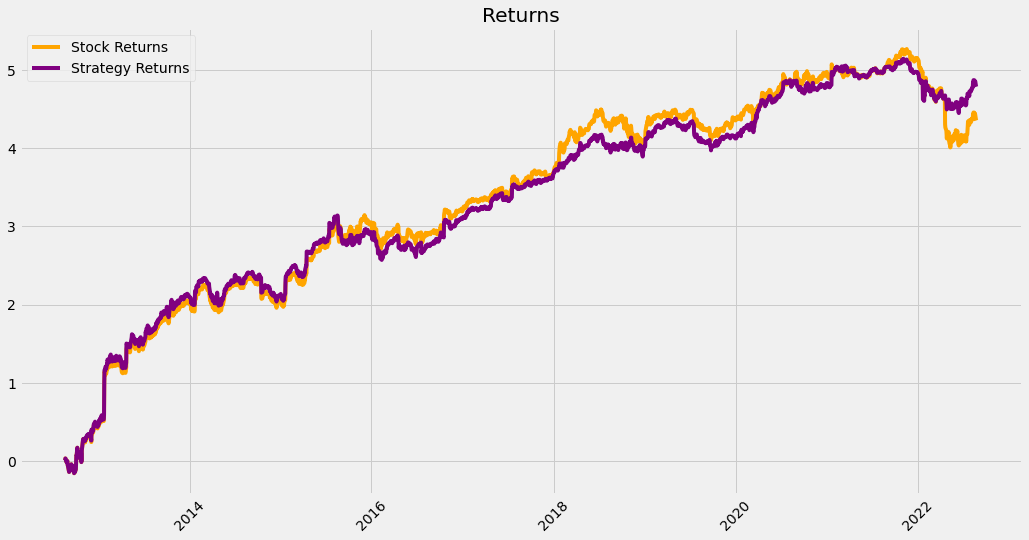

In [17]:
#Visualize the data

plt.figure(figsize=(16,8))
plt.title('Returns')
plt.plot(df['Cumul_Ret'], color ='orange', label='Stock Returns')
plt.plot(df['Cumul_Strategy'], color ='purple', label='Strategy Returns')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [18]:
#Print the returns

print('The stock gives a return of', df['Cumul_Ret'][-1]*100,'%')
print('The strategy gives a return of', df['Cumul_Strategy'][-1]*100,'%')

The stock gives a return of 435.52013741207764 %
The strategy gives a return of 478.64970673113214 %
